In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
files.upload()

In [3]:
with open('20230727_195816_hn_sharings.json', 'r') as f:
    json_data = json.load(f)

In [4]:
df_sources = pd.DataFrame(json_data["Sources"])
gptsharing = df_sources['ChatgptSharing']
tokenAnswers = []

for row in range(len(gptsharing)):
    row_value = gptsharing.iloc[row][0]
    tokenAnswers.append(row_value)

tokenAnswers = pd.DataFrame(tokenAnswers)
conversations = tokenAnswers['Conversations']

In [5]:
topics = []
turns = []


for row in range(len(tokenAnswers)):
    row_value = tokenAnswers.iloc[row]
    topics.append(row_value['Title'])
    turns.append(row_value['NumberOfPrompts'])

df = pd.DataFrame({'Topic': topics, 'NumberOfPrompts': turns})
df['NumberOfPrompts'].fillna(df['NumberOfPrompts'].mean(), inplace=True)


low_complexity_threshold = 3
medium_complexity_threshold = 6

df['Complexity'] = np.where(df['NumberOfPrompts'] <= low_complexity_threshold, 'Low', np.where(df['NumberOfPrompts'] <= medium_complexity_threshold, 'Medium', 'High'))

mean_turns = df['NumberOfPrompts'].mean()
mode_turns = df['NumberOfPrompts'].mode()[0]

print("mean:",mean_turns)
print("mode:",mode_turns)

mean: 4.1652892561983474
mode: 1.0


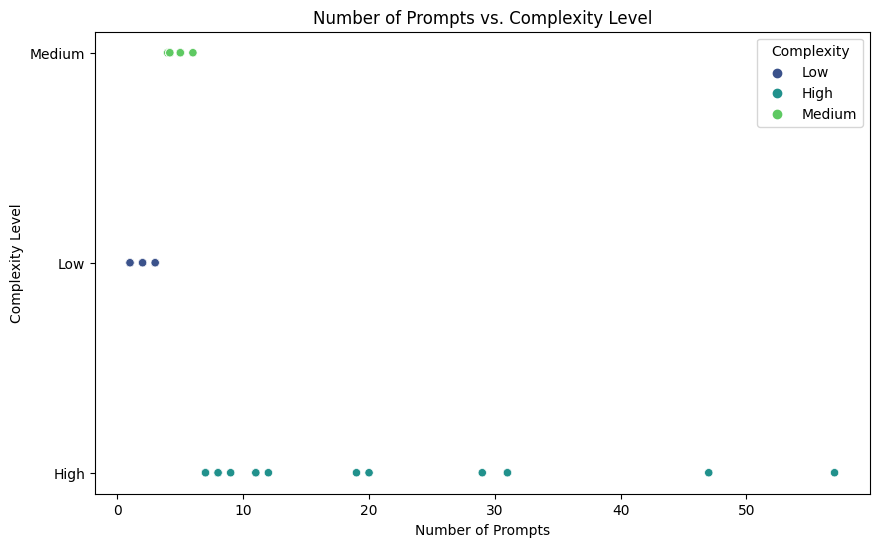

In [7]:
label_encoder = LabelEncoder()
df['ComplexityEncoded'] = label_encoder.fit_transform(df['Complexity'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumberOfPrompts', y='ComplexityEncoded', hue='Complexity', data=df, palette='viridis')
plt.yticks(range(len(label_encoder.classes_)), label_encoder.classes_)
plt.xlabel('Number of Prompts')
plt.ylabel('Complexity Level')
plt.title('Number of Prompts vs. Complexity Level')
plt.legend(title='Complexity')
plt.show()